# Natural Image (Cifar10) Recognition with CNN

*@masahiro rikiso, 170209*

---

open this notebook by typing the following command in terminal:

```
$ jupyter nbextension enable --py widgetsnbextension
$ jupyter notebook
```

## 1) Preparation

In [28]:
import keras.backend as K
K.image_dim_ordering()

'tf'

In [3]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

## 2) Load Cifar10

In [4]:
from keras.datasets import cifar10

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
type(X_train)

numpy.ndarray

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [26]:
num2label = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"    
}    

In [8]:
from matplotlib import pyplot as plt

In [9]:
%matplotlib inline
from ipywidgets import interact

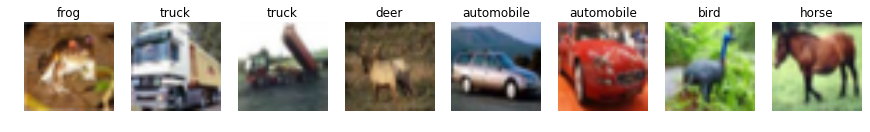

In [32]:
@interact(i=(0,10))
def plot(i=0):
    fig, ax = plt.subplots(ncols=8)
    fig.set_size_inches((15,4))
    for j in range(8):
        ax[j].imshow(X_train[i*8+j])
        ax[j].set_axis_off()
        ax[j].set_title(num2label[y_train[i*8+j][0]])

## 3) Create and Train Convolutional Neural Network(CNN)

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
#from keras.callbacks import TensorBoard

In [34]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [35]:
nb_classes = 10

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [37]:
batch_size = 128
#nb_epoch = 20
nb_epoch = 3

model = Sequential()

model.add(Convolution2D(32, 3, 3, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Flatten())
#model.add(Dense(128))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.summary()
          
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

          #tb = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True)

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test)
#                    ,callbacks=[tb]
                   )
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_2 (Convolution2D)  (None, 30, 30, 32)    896         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 30, 30, 32)    0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 28, 28, 32)    9248        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 28, 28, 32)    0           convolution2d_3[0][0]            
___________________________________________________________________________________________

* number of learning epochs is not sufficent
* you can get better feature extracted by CNN by running more epochs

### retrain

In [40]:
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test)
#                    ,callbacks=[tb]
                   )

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 235s - loss: 1.2187 - acc: 0.5732 - val_loss: 1.1785 - val_acc: 0.5885

In [41]:
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=4,
                    verbose=1, validation_data=(X_test, Y_test)
#                    ,callbacks=[tb]
                   )

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 209s - loss: 1.0158 - acc: 0.6479 - val_loss: 1.0096 - val_acc: 0.6498

### save model architecture and learned weight

In [42]:
mkdir models

mkdir: models: File exists


In [43]:
open('models/net.yaml', 'w').write(model.to_yaml())
model.save_weights('models/weight.h5')

## 4) Test CNN model with unseen data

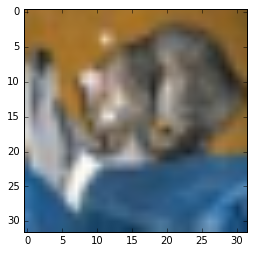

In [44]:
plt.imshow(X_test[0], cmap='bone')

In [46]:
num = model.predict_classes(X_test[0].reshape(1,32,32,3))
num2label[num[0]]

1/1 [==============================] - 0s


'cat'

## 5) Visualize model

In [47]:
from keras.utils.visualize_util import plot
plot(model, to_file="model_cifar10.png", show_shapes=True, show_layer_names=True)

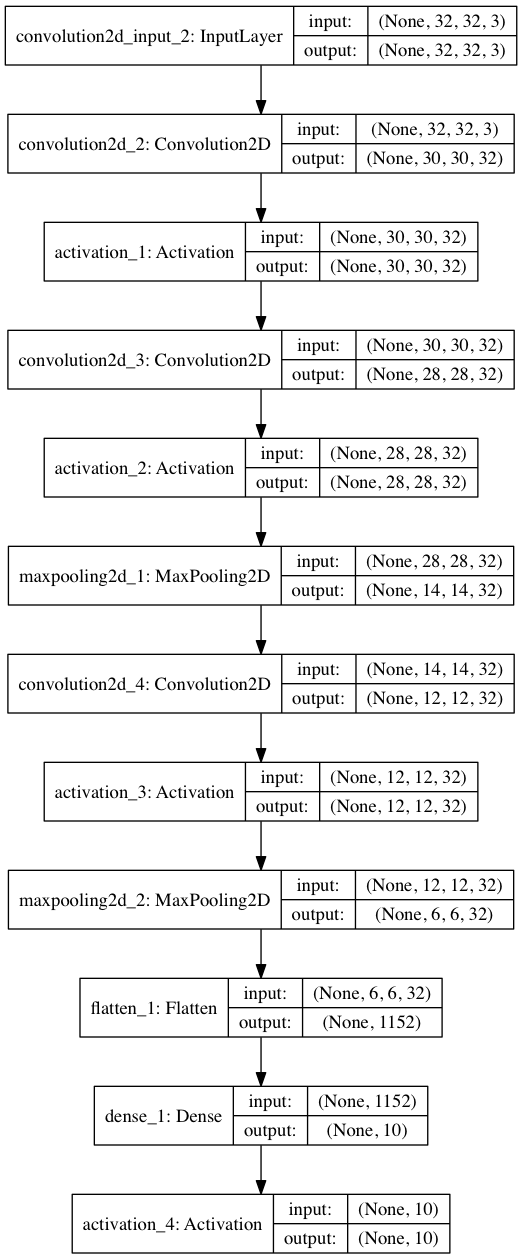

In [48]:
from IPython.display import Image
Image("model_cifar10.png", width=400)

## 6) Visualize the filter of the convolution layer

In [49]:
model.layers

In [50]:
type(model.layers[0].get_weights())

list

In [51]:
type(model.layers[0].get_weights()[0])

numpy.ndarray

In [54]:
w1 = model.layers[0].get_weights()[0]
w1.shape

(3, 3, 3, 32)

## 1st layer's weight

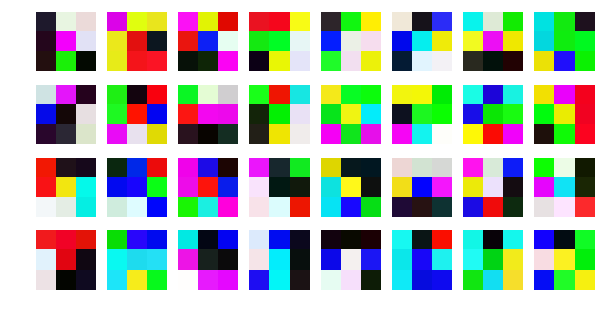

In [55]:
fig, ax = plt.subplots(nrows=4,ncols=8)
fig.set_size_inches((10,5))
for i in range(4):
    for j in range(8):
        w1_ = w1[:,:,:,i*8+j].squeeze()
        ax[i][j].imshow(w1_,cmap="bone",interpolation="nearest")
        ax[i][j].set_axis_off()

## 2nd layer's weight

In [56]:
model.layers

In [58]:
w2 = model.layers[2].get_weights()[0]
w2.shape

(3, 3, 32, 32)

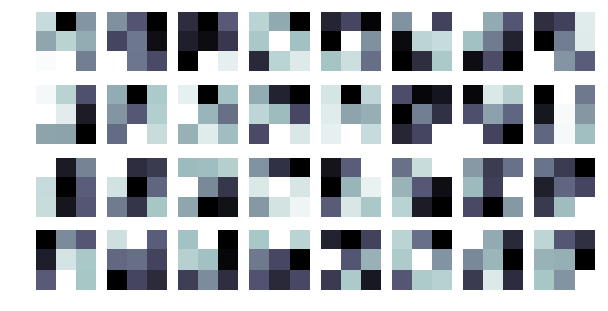

In [59]:
@interact(channel=(0,31))
def plot_w2(channel=5):
    fig, ax = plt.subplots(nrows=4,ncols=8)
    fig.set_size_inches((10,5))
    for i in range(4):
        for j in range(8):
            w2_ = w2[:,:,channel,i*8+j].squeeze()
            ax[i][j].imshow(w2_,cmap="bone",interpolation="nearest")
            ax[i][j].set_axis_off()

## 7) Visualize the output of the convolution layer

## !choose input image!

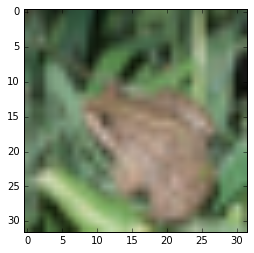

In [60]:
i = 4

test_img = X_test[i].reshape(1,32,32,3)
plt.imshow(X_test[i])

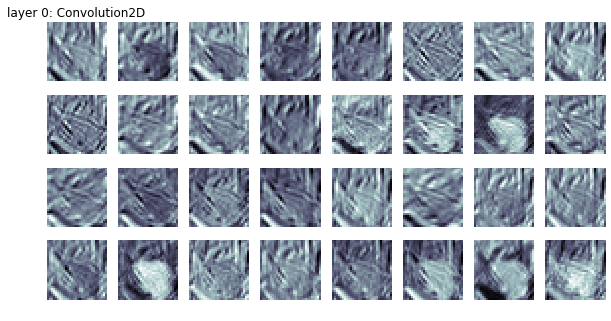

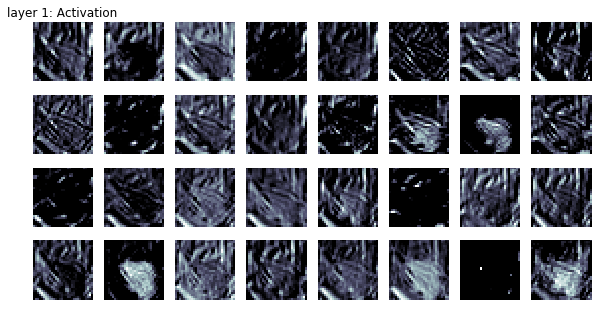

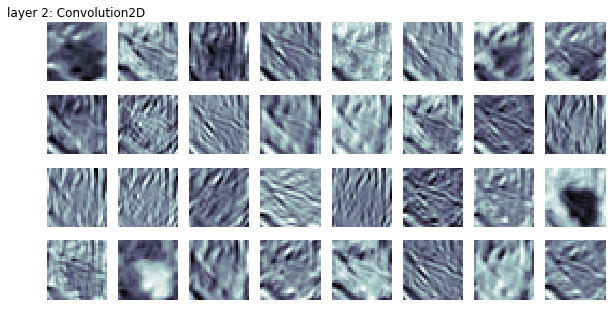

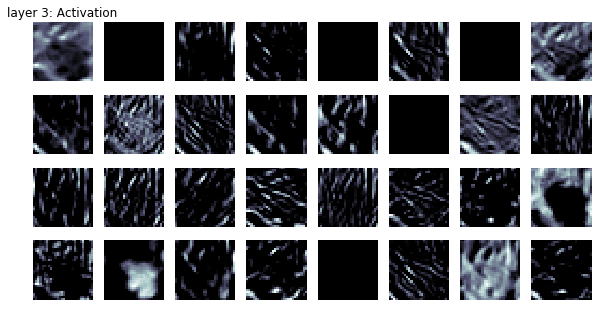

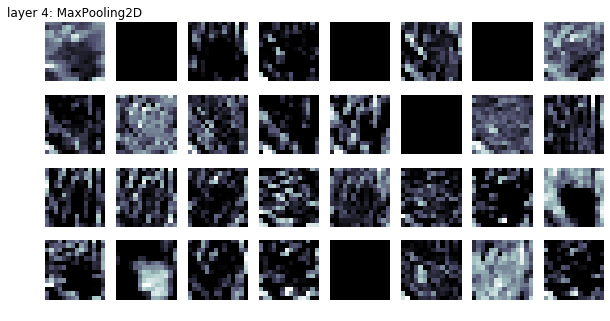

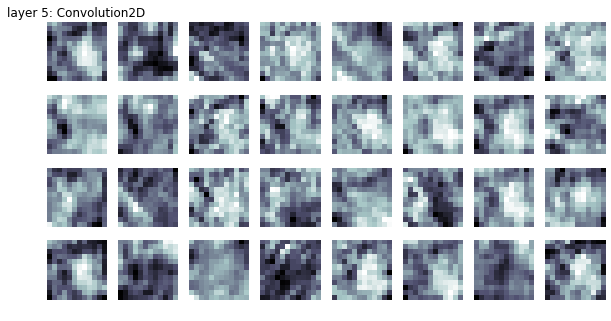

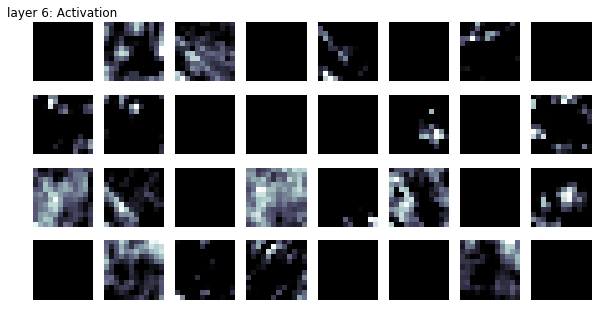

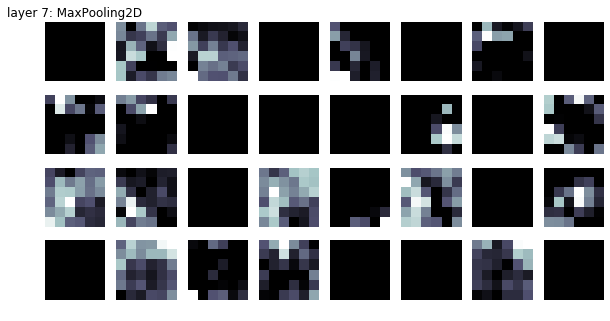

In [83]:
for l in range(8):
    get_layer_output = K.function([model.layers[0].input],
                                      [model.layers[l].output])
    layer_output = get_layer_output([test_img])[0]
    fig, ax = plt.subplots(nrows=4,ncols=8)
    fig.set_size_inches((10,5))
    for i in range(4):
        for j in range(8):
            out_ = layer_output[:,:,:,i*8+j].squeeze()
            ax[i][j].imshow(out_,cmap="bone",interpolation="nearest")
            ax[i][j].set_axis_off()
    ax[0][0].set_title("layer " + str(l) + ": " + str(model.layers[l]).split(".")[3].split(" ")[0])

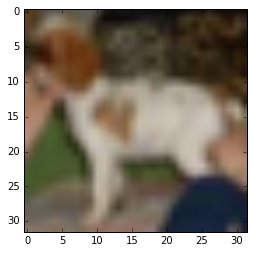

In [97]:
i = 12

test_img = X_test[i].reshape(1,32,32,3)
plt.imshow(X_test[i])

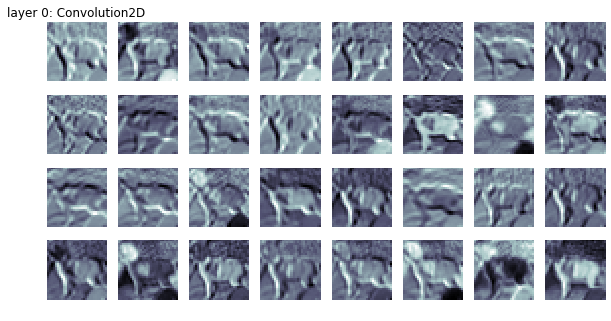

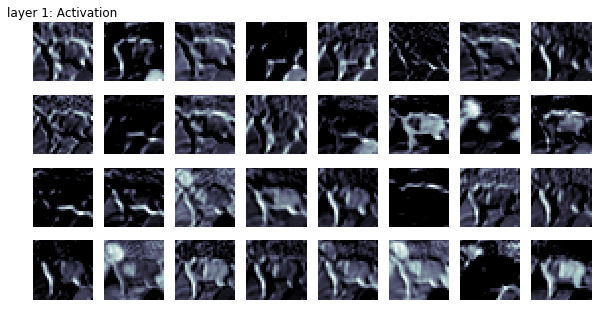

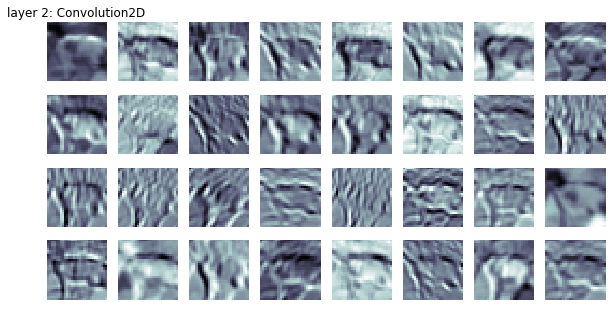

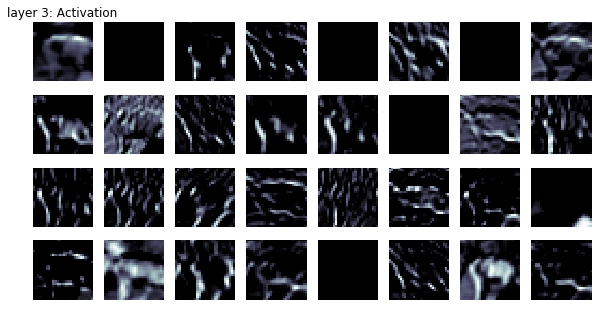

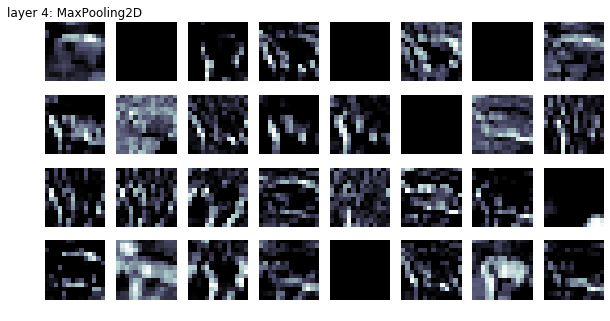

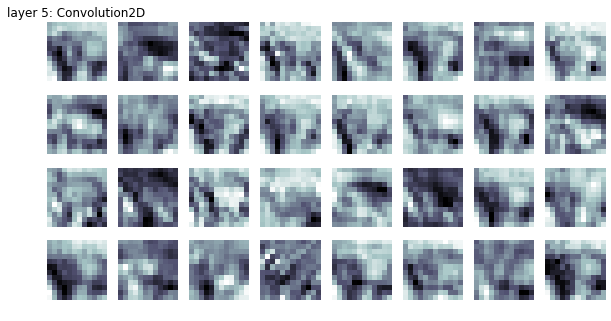

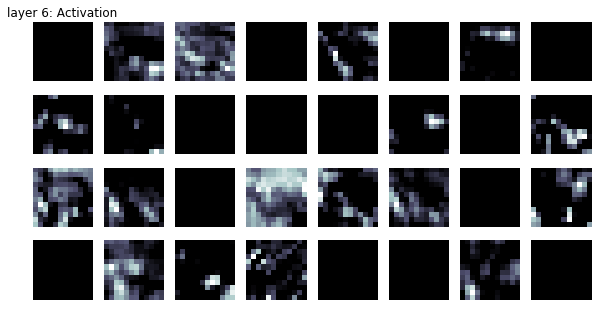

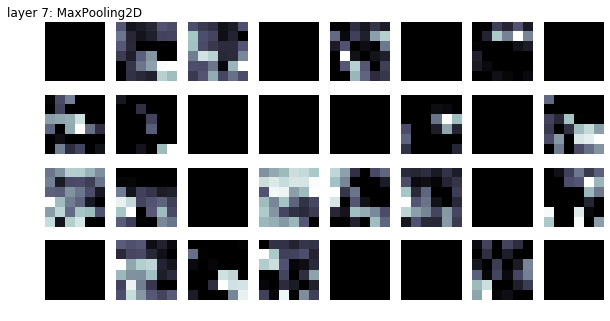

In [98]:
for l in range(8):
    get_layer_output = K.function([model.layers[0].input],
                                      [model.layers[l].output])
    layer_output = get_layer_output([test_img])[0]
    fig, ax = plt.subplots(nrows=4,ncols=8)
    fig.set_size_inches((10,5))
    for i in range(4):
        for j in range(8):
            out_ = layer_output[:,:,:,i*8+j].squeeze()
            ax[i][j].imshow(out_,cmap="bone",interpolation="nearest")
            ax[i][j].set_axis_off()
    ax[0][0].set_title("layer " + str(l) + ": " + str(model.layers[l]).split(".")[3].split(" ")[0])